<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Reza Vahidimajd
### Student Number : 99102491
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [3]:
# TODO
#!pip install umap-learn
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import umap
from sklearn.decomposition import PCA
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=daae4609cd7143fd647b55edbec333a910ea4f6bd7e568a222066fe322e7ed2f
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=1205bcaf07398647af6520d009f49bad3c809905c9fe4b2c00328b65223ad678
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#data = pd.read_csv("/METABRIC_RNA_MUTATION.csv")
#data.head
df = pd.read_csv("/content/drive/MyDrive/METABRIC_RNA_Mutation.csv")
df

# split to datasets

clinical = df[df.columns[:31]]

columns = df.columns[31:]
gene_expression_columns = []
gene_mutation_columns = []
for x in columns:
  if x.endswith("_mut"):
    gene_mutation_columns.append(x)
  else:
    gene_expression_columns.append(x)

gene_expressions = df[gene_expression_columns]
gene_mutatio = df[gene_mutation_columns]



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## EDA

For each dataset, you must perform a sufficient EDA.

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

<ipython-input-7-a07c01c9fcf4>:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = clinical.select_dtypes(include=[np.object])
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


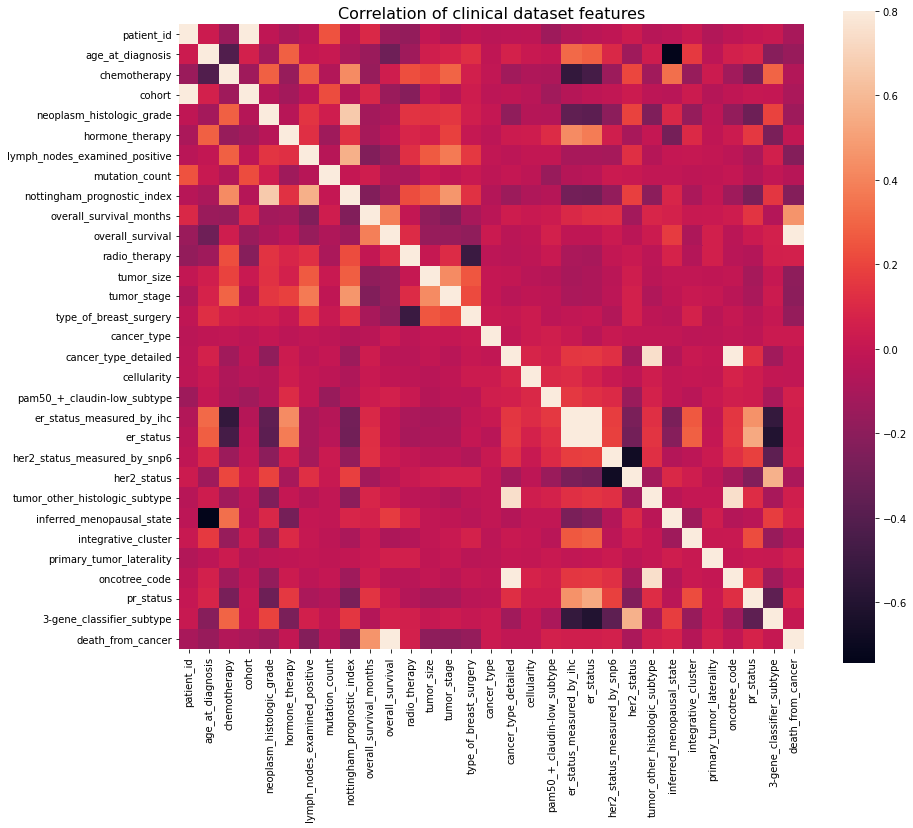

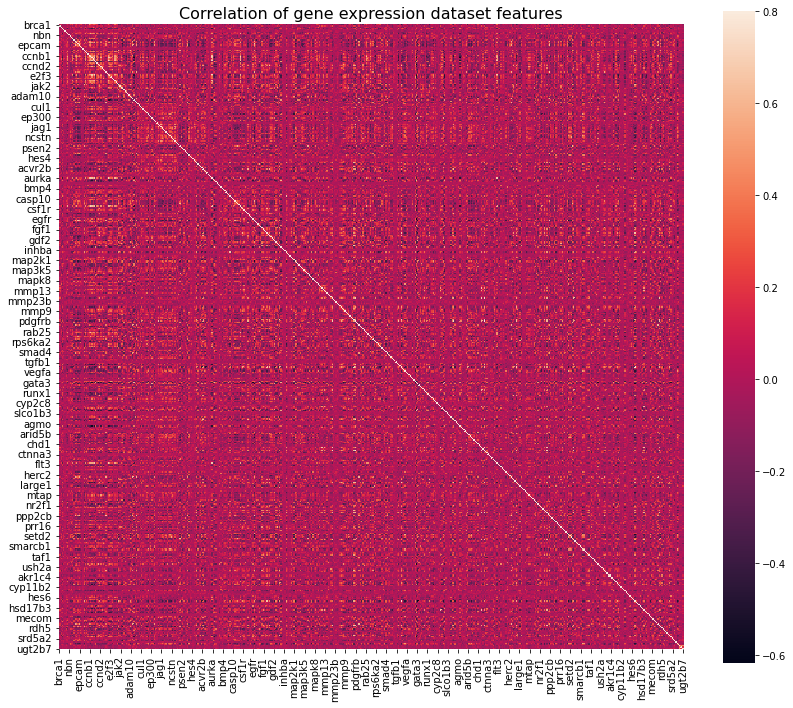

In [7]:
# TODO

# replace NA data (only clinical dataset has NA values)

print(clinical.isna().sum())

numeric_features = clinical.select_dtypes(include=[np.number])
categorical_features = clinical.select_dtypes(include=[np.object])

numeric_features.fillna((numeric_features.mean()), inplace=True)
categorical_features = categorical_features.apply(lambda x:x.fillna(x.value_counts().index[0]))



# replace labels with numbers

categorical_features = categorical_features.apply(LabelEncoder().fit_transform)

# join numerical and categorical features

clinical = numeric_features.join(categorical_features)
print(clinical.isna().sum())

#plot correlation matrix of clinical(numeric features) and gene expression dataset

correlation = clinical.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of clinical dataset features',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

correlation = gene_expressions.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of gene expression dataset features',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [8]:
clinical.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype,death_from_cancer
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1904.000000,1904.000000,1904.00000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,1.511555,0.123950,0.72584,0.215861,5.107143,0.453256,1.525210,0.529937,1.033088,1.094538
std,2358.478332,12.978711,0.405971,1.228615,0.638185,0.486343,4.079993,4.010503,1.144492,76.334148,...,0.832140,0.329611,1.58004,0.411527,3.170919,0.497941,1.264493,0.499234,0.929155,0.859855
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,1.000000,0.000000,0.00000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4730.500000,61.770000,0.000000,3.000000,2.415939,1.000000,0.000000,5.000000,4.042000,115.616667,...,2.000000,0.000000,0.00000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,2.000000,0.000000,0.00000,0.000000,8.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,3.000000,1.000000,7.00000,1.000000,10.000000,1.000000,5.000000,1.000000,3.000000,2.000000


In [ ]:
gene_expressions.describe()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,7.463684e-18,-3.676471e-07,-0.000001,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,1.000262,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,-2.968600,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-7.385500e-01,-6.667750e-01,-0.683925,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-1.311000e-01,-1.445000e-02,-0.054800,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,5.431250e-01,6.387250e-01,0.668925,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200e+00,5.371300e+00,6.178600,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [9]:
# clinical dataset has 31 features which is suitable(not too much)
# but gene expression dataset has 489 columns. training on this dataset may take a lot of time and doesnt
# an approperiate result due to large number of features. also may lots of features doesnt give us
# good and positive information. spo by reducing this dataset features, we can extract te information
# from it to a lower dimension dataset. 
# so we need to reduce dimension of gene expression dataset

reducer = umap.UMAP(n_components = 20)
embedding = reducer.fit_transform(gene_expressions)
embedding.shape



(1904, 20)

In [10]:
columns = []
for i in range(20):
  columns.append("C" + str(i + 1))
reduced_gene_expressions = pd.DataFrame(embedding, columns = columns)


In [11]:
reduced_gene_expressions.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,9.466255,1.815689,11.238039,3.649107,8.455838,6.446412,3.363781,6.180883,5.630457,6.569665,6.030414,3.911563,6.909702,5.861432,3.873869,7.089621,7.820300,5.831992,3.590711,6.601243
std,0.446973,0.541812,0.723053,0.552452,0.526578,0.212758,0.507592,0.108082,0.559681,0.251713,0.220245,0.406988,0.608374,0.197159,0.292814,0.299519,0.292922,0.467945,0.309504,0.453974
min,8.538253,0.520266,9.676050,1.055241,7.179051,5.847579,2.291625,5.753412,4.413197,5.788946,5.464107,3.195911,5.463798,5.397100,3.112108,5.906295,7.135954,4.974800,2.895488,5.413757
25%,9.092408,1.455467,10.740248,3.308208,8.048229,6.305460,3.001691,6.125754,5.197663,6.424946,5.907501,3.566622,6.440588,5.728665,3.660245,6.876404,7.592316,5.446420,3.351173,6.412506
50%,9.425064,1.782970,11.351969,3.722839,8.487809,6.462355,3.245292,6.194037,5.647872,6.584948,6.027403,3.887136,6.919079,5.850599,3.880559,7.132138,7.824986,5.760061,3.597992,6.693312
75%,9.756872,2.180186,11.780901,4.080252,8.910440,6.601056,3.665137,6.244050,6.031477,6.711000,6.154461,4.212769,7.408179,5.988728,4.114740,7.339903,8.046109,6.162418,3.862026,6.886146
max,10.447385,3.136911,12.822905,4.548349,9.489248,6.900186,4.674943,6.419196,6.897116,7.184712,7.130363,5.183619,8.158521,6.355174,4.425247,7.674577,8.572245,7.049644,4.282939,7.650636


In [12]:
# finding most important features of gene expression dataset using PCA

model = PCA(n_components=10).fit(gene_expressions)
X_pc = model.transform(gene_expressions)
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = gene_expressions.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
most_important_df = pd.DataFrame(dic.items())
most_important_df

,0,1
0,PC0,hsd17b11
1,PC1,ccne1
2,PC2,acvrl1
3,PC3,aph1a
4,PC4,mmp11
5,PC5,smarcc1
6,PC6,numbl
7,PC7,rab25
8,PC8,ncoa3
9,PC9,nr2f1


# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [13]:
# TODO

def random_forest(x_train, y_train, x_test, y_test, n_estimators=10):
  clf = RandomForestClassifier(n_estimators=n_estimators)
  clf.fit(x_train, y_train)
  y_prd = clf.predict(x_test)
  acc = accuracy_score(y_test, y_prd)
  return acc, y_prd

In [ ]:
# random forest for clinical dataset

x = clinical.drop("death_from_cancer",axis=1).drop("overall_survival",axis=1)
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)
acc, prd = random_forest(x_train, y_train, x_test, y_test)
print(x.shape)
print("accuracy on clinical: " + str(acc))

accuracy on clinical: 0.712241653418124


In [ ]:
# random forest for gene expression dataset

x = gene_expressions
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)
acc, prd = random_forest(x_train, y_train, x_test, y_test)
print(x.shape)
print("accuracy on gene expressions : " + str(acc))

accuracy on gene expressions : 0.6232114467408585


In [ ]:
# random forest for reduced gene expression dataset

x = reduced_gene_expressions
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)
acc, prd = random_forest(x_train, y_train, x_test, y_test)
print(x.shape)
print("accuracy on gene expressions : " + str(acc))

accuracy on gene expressions : 0.6104928457869634


In [ ]:
# random forest for joint of clinical and reduced gene expression datasets

x = clinical.drop("death_from_cancer",axis=1).drop("overall_survival",axis=1)
x = x.join(reduced_gene_expressions)
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)
acc, prd = random_forest(x_train, y_train, x_test, y_test)
print(x.shape)
print("accuracy on gene expressions : " + str(acc))

accuracy on gene expressions : 0.724960254372019


In [18]:
# random forest for joint of clinical, reduced gene expression and gene expression datasets

x = clinical.drop("death_from_cancer",axis=1).drop("overall_survival",axis=1)
x = x.join(reduced_gene_expressions)
x = x.join(gene_expressions)
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)
acc, prd = random_forest(x_train, y_train, x_test, y_test)
print(x.shape)
print("accuracy on gene expressions : " + str(acc))

(1904, 538)
accuracy on gene expressions : 0.6454689984101749


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
# TODO

#define neural network model

class Net(nn.Module):

    def __init__(self, dimensions):
        super(Net, self).__init__()
        
        list_layers = []
        for i in range(len(dimensions)):
          list_layers.append(nn.Linear(dimensions[i][0], dimensions[i][1]))
          if i == len(dimensions) - 1:
            list_layers.append(nn.Softmax(1))

          else:
            list_layers.append(nn.ELU())
            list_layers.append(nn.BatchNorm1d(dimensions[i][1]))
        self.layers = nn.Sequential(*list_layers)


    def forward(self, x):
      for l in self.layers:
        x = l(x)
      return x

In [ ]:
# define dataset class

class Custom(Dataset):
  def __init__(self,X,y):
    self.X=np.array(X)
    self.y=np.array(y)

  def __getitem__(self,index):
    return (self.X[index],self.y[index])

  def __len__(self):
    return len(self.X)

In [ ]:
# define hyperparameters
lr = 0.001
bs = 32
epochs = 20

def train_test(train_dataset, test_dataset, layers):

# prepare data

  train_loader = DataLoader(train_dataset, batch_size = bs, shuffle = True)
  test_loader = DataLoader(test_dataset, batch_size = bs, shuffle = True)

# define model, loss function and optimizer 

  model = Net(layers)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# start training

  train_losses = []
  train_accuracy = []
  for epoch in range(epochs):
      train_acc = 0
      train_loss = 0
      val_acc = 0
      val_loss = 0
      model.train()
      for inputs, labels in train_loader:
          inputs = inputs.to(torch.float32)
          labels = labels.type(torch.LongTensor)
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          train_loss += loss.item() * len(inputs)
          loss.backward()
          optimizer.step()


          preds = np.argmax(outputs.detach().numpy() , axis=1)

          for x in range(len(preds)):
              if preds[x] == labels[x]:
                  train_acc += 1
      train_loss /= len(train_dataset)
      train_acc /= len(train_dataset)

      train_losses.append(train_loss)
      train_accuracy.append(train_acc)


  # test model

  test_acc = 0
  with torch.no_grad():
      for inputs, labels in test_loader:
            inputs = inputs.to(torch.float32)
            labels = labels.type(torch.LongTensor)
            outputs = model(inputs)
            #pass # Write your code here
            preds = np.argmax(outputs.detach().numpy(), axis=1)

            for x in range(len(preds)):
                if preds[x] == labels[x]:
                    test_acc += 1

      test_acc /= len(test_dataset)

  return train_losses, train_accuracy, test_acc


In [ ]:
def plot_result(train_losses, train_accuracy):

  plt.title("train loss")
  plt.plot(train_losses)
  plt.show()

  plt.title("train accuracy")
  plt.plot(train_accuracy)
  plt.show()

(1904, 29)


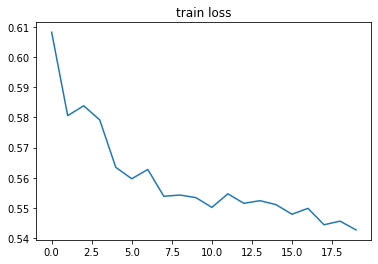

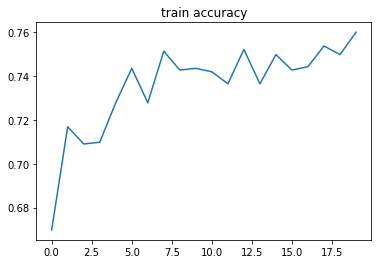

test accuracy of clinical: 0.7551669316375199


In [ ]:
# neural network for clinical dataset

# prepare data and layers

x = clinical.drop("death_from_cancer",axis=1).drop("overall_survival",axis=1)
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)

print(x.shape)

train_dataset = Custom(x_train, y_train)
test_dataset = Custom(x_test, y_test)

layers = [[29, 32], [32, 64], [64, 128], [128, 128], [128, 64], [64, 28], [28, 14], [14, 2]]

train_losses, train_accuracy, test_acc = train_test(train_dataset, test_dataset, layers)

# show results

plot_result(train_losses, train_accuracy)
print("test accuracy of clinical: " + str(test_acc))

(1904, 489)


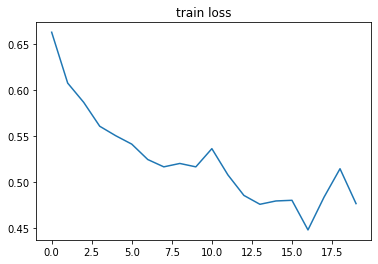

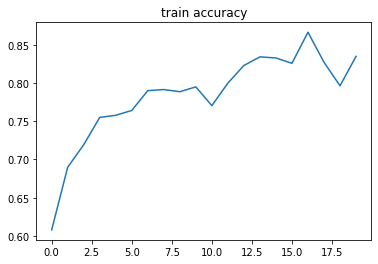

test accuracy of gene expression: 0.6176470588235294


In [ ]:
# neural network for gene expression dataset

# prepare data and layers

x = gene_expressions
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle= True)

print(x.shape)

train_dataset = Custom(x_train, y_train)
test_dataset = Custom(x_test, y_test)

layers = [[489, 680], [680, 820], [820, 1080], [1080, 1080], [1080, 780], [780, 420], [420, 200], [200, 80], [80, 16], [16, 2]]

train_losses, train_accuracy, test_acc = train_test(train_dataset, test_dataset, layers)

# show results

plot_result(train_losses, train_accuracy)
print("test accuracy of gene expression: " + str(test_acc))

(1904, 20)


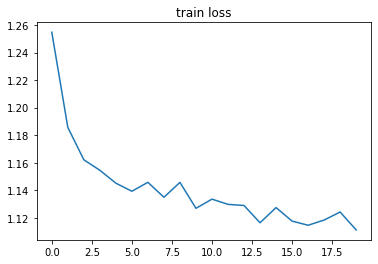

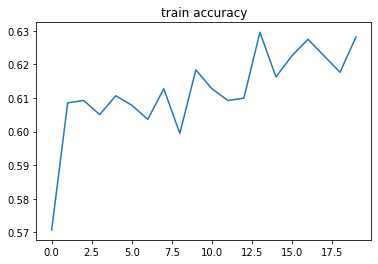

test accuracy of reduced gene expression: 0.6281512605042017


In [ ]:
# neural network for reduced gene expression dataset

# prepare data and layers

x = reduced_gene_expressions
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle= True)

print(x.shape)

train_dataset = Custom(x_train, y_train)
test_dataset = Custom(x_test, y_test)

layers = [[20, 32], [32, 64], [64, 96], [96, 96], [96, 72], [72, 48], [48, 16], [16, 4]]

train_losses, train_accuracy, test_acc = train_test(train_dataset, test_dataset, layers)

# show results

plot_result(train_losses, train_accuracy)
print("test accuracy of reduced gene expression: " + str(test_acc))

(1904, 49)


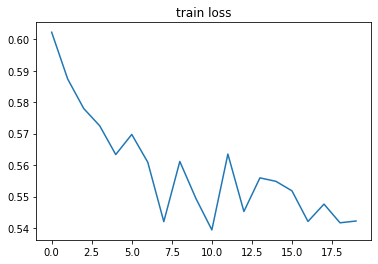

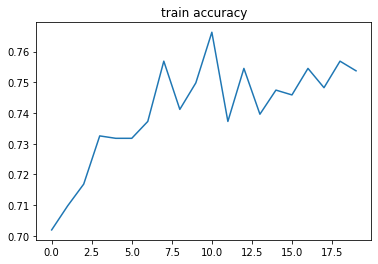

test accuracy of joint clinical and reduced gene expression: 0.7710651828298887


In [ ]:
# neural network for reduced gene expression dataset

# prepare data and layers

x = clinical.drop("death_from_cancer",axis=1).drop("overall_survival",axis=1)
x = x.join(reduced_gene_expressions)
y = clinical["overall_survival"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True)

print(x.shape)

train_dataset = Custom(x_train, y_train)
test_dataset = Custom(x_test, y_test)

layers = [[49, 64], [64, 96], [96, 128], [128, 160], [160, 160], [160, 120], [120, 72], [72, 32], [32, 16], [16, 2]]

train_losses, train_accuracy, test_acc = train_test(train_dataset, test_dataset, layers)

# show results

plot_result(train_losses, train_accuracy)
print("test accuracy of joint clinical and reduced gene expression: " + str(test_acc))

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

#### \# TODO

In [ ]:
# By considering test accuracy printed in above cells, neural network model seems
# better because of higher accuracy on test data. also we didnt try different kind of models with
# variant modules and layers. its obvious that by changing layers and experimenting different 
# values of hyperparameters like learning rate and number of epochs, we can reach higher
# accuracy.
# among datasets, joint dataset of clinical and reduced gene expression had better accuracy
# than others, it is because its feature numbers is proper, it is not very large to make 
# our model very complex and take time to train and predict and it is not very small 
# to doesnt have enough information for predicting. on the other hand this dataset contains both 
# clinical and gene details. so having important features of genes besides clinical details can train
# a better model for us.
# clinical dataset alone gives us better result than gene expressions, it means that clinical features 
# which gives us detail about health and physical condition of patients is more important than gene expressions.
# but as it is said above, adding gene expressions gives us better information and better model.
# among gene expression and reduced gene expressions, gene expression had a better result. however 
# difference between accuracies is not too much but we can deduce that many of gene features are not too important and
# we can reduce its dataset dimension and with having important parts, we can get better result.
# also train of reduced gene expression took less time than gene expression so we can say reduced gene expression is
# better that gene expression. 